In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, log_loss,  f1_score, precision_score, recall_score, precision_recall_curve,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn import  datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd_data = pd.read_csv("res/bioresponse.csv")

print(pd_data)

      Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8        D9  ...  D1767  D1768  D1769 

In [3]:
X = pd_data[pd_data.columns.drop('Activity')]
Y = pd_data['Activity']

print(X)
print(Y)

            D1        D2    D3   D4        D5        D6        D7        D8  \
0     0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1     0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2     0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3     0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4     0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   
...        ...       ...   ...  ...       ...       ...       ...       ...   
3746  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659  0.376124   
3747  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876  0.404546   
3748  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341  0.471179   
3749  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713  0.447162   
3750  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667  0.272652   

            D9       D10  ...  D1767  D1768  D1769 

In [4]:
X = StandardScaler().fit_transform(X)

some helpfull functions:

In [5]:
def print_stat(test_labels, prediction):
    print('Precision: ',metrics.precision_score(test_labels, prediction))
    print('Recall: ',metrics.recall_score(test_labels, prediction))
    print('Accuracy: ',metrics.accuracy_score(test_labels, prediction))
    print('F1: ',f1_score(test_labels, prediction))
    print('log_loss: ',log_loss(test_labels, classifier.predict_proba(test_data)))

def build_precision_recall_curve(classifier, test_data, test_labels):
    y_probability = classifier.predict_proba(test_data)
    prec1, rec1, thresh1 = precision_recall_curve(test_labels,y_probability[:,1])
    plt.figure(figsize=(6, 6))
    plt.grid()
    plt.plot(thresh1, rec1[:-1], label="Recall")
    plt.plot(thresh1, prec1[:-1], label="Precision")
    plt.xlabel('Threshold')
    plt.title('Precision-Recall')
    plt.legend()
    plt.show()
    plt.clf()

def build_roc_auc(classifier, test_data, test_labels):
    roc_auc1 = roc_auc_score(classifier.predict(test_data),test_labels)
    y_probability = classifier.predict_proba(test_data)
    fpr1, tpr1, thr1 = roc_curve(test_labels,y_probability[:,1])
    plt.figure(figsize = (6,6))
    plt.plot(fpr1, tpr1, label='ROC line')
    plt.grid()
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC curve, ROC AUC={}".format(round(roc_auc1,3)))
    plt.legend()
    plt.show()
    plt.clf()

In [6]:
train_data, test_data, train_labels, test_labels = train_test_split(X,Y)

## single tree with max depth = 6

Precision:  0.7599243856332704
Recall:  0.8237704918032787
Accuracy:  0.7729211087420043
F1:  0.7905604719764011
log_loss:  1.592549684802086


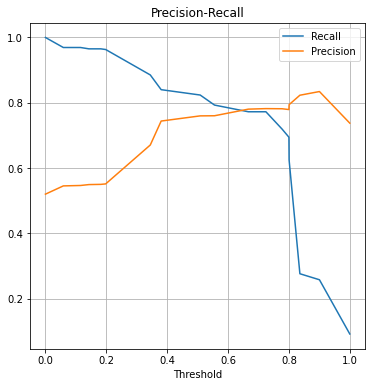

<Figure size 432x288 with 0 Axes>

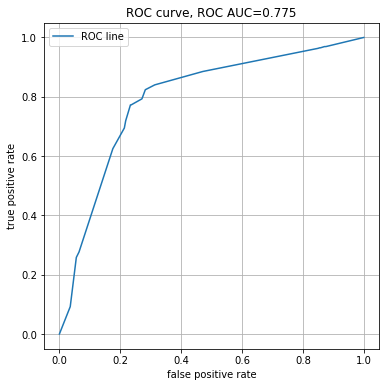

<Figure size 432x288 with 0 Axes>

In [7]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6)
classifier.fit(train_data, train_labels)
prediction=classifier.predict(test_data)
print_stat(test_labels, prediction)
build_precision_recall_curve(classifier, test_data, test_labels)
build_roc_auc(classifier, test_data, test_labels)

## single tree with max depth = 50

Precision:  0.7195121951219512
Recall:  0.7254098360655737
Accuracy:  0.7100213219616205
F1:  0.7224489795918366
log_loss:  10.015508720059387


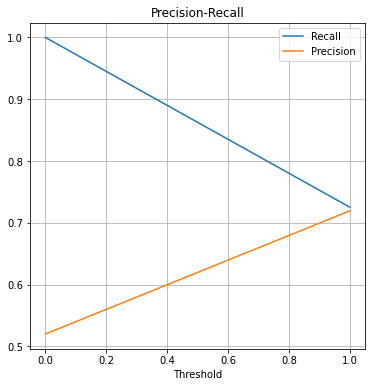

<Figure size 432x288 with 0 Axes>

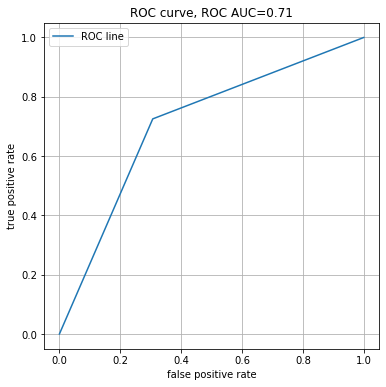

<Figure size 432x288 with 0 Axes>

In [8]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=50)
classifier.fit(train_data, train_labels)
prediction=classifier.predict(test_data)
print_stat(test_labels, prediction)
build_precision_recall_curve(classifier, test_data, test_labels)
build_roc_auc(classifier, test_data, test_labels)

## random forest with max depth = 6

Precision:  0.7747572815533981
Recall:  0.8176229508196722
Accuracy:  0.7814498933901919
F1:  0.7956131605184447
log_loss:  0.5331547279889334


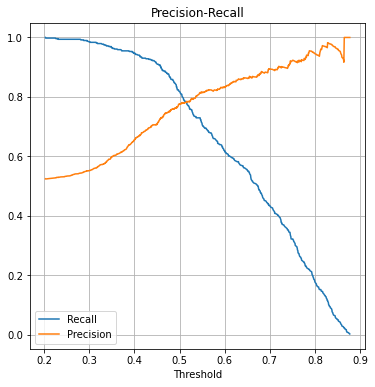

<Figure size 432x288 with 0 Axes>

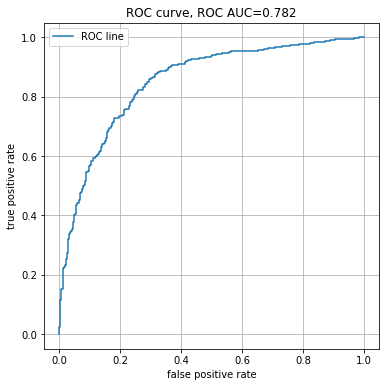

<Figure size 432x288 with 0 Axes>

In [9]:
classifier=RandomForestClassifier(max_depth=6)
classifier.fit(train_data, train_labels)
prediction=classifier.predict(test_data)
print_stat(test_labels, prediction)
build_precision_recall_curve(classifier, test_data, test_labels)
build_roc_auc(classifier, test_data, test_labels)

## random forest with max depth = 50

Precision:  0.7965116279069767
Recall:  0.8422131147540983
Accuracy:  0.8059701492537313
F1:  0.8187250996015936
log_loss:  0.4566229951308807


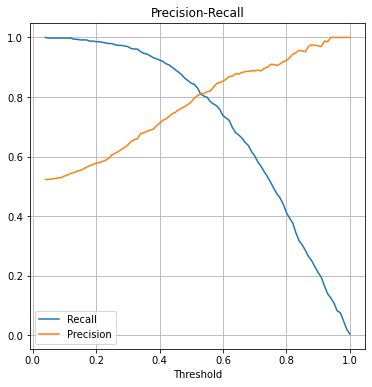

<Figure size 432x288 with 0 Axes>

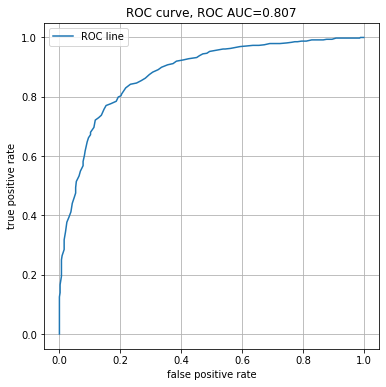

<Figure size 432x288 with 0 Axes>

In [10]:
classifier=RandomForestClassifier(max_depth=50)
classifier.fit(train_data, train_labels)
prediction=classifier.predict(test_data)
print_stat(test_labels, prediction)
build_precision_recall_curve(classifier, test_data, test_labels)
build_roc_auc(classifier, test_data, test_labels)

## Train a classifier who avoids Type II (False Negative) errors

Precision:  0.5714285714285714
Recall:  0.9508196721311475
Accuracy:  0.603411513859275
F1:  0.7138461538461538
log_loss:  0.9288985881539237


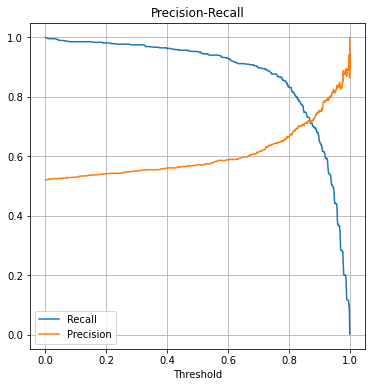

<Figure size 432x288 with 0 Axes>

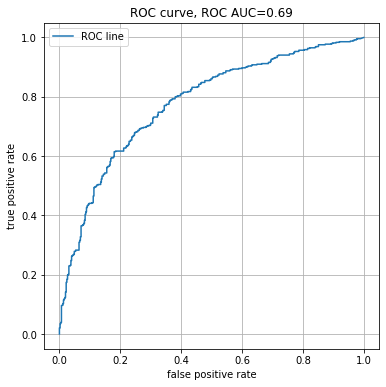

<Figure size 432x288 with 0 Axes>

In [11]:
classifier=RandomForestClassifier(max_depth=50, class_weight={0: 0.1, 1: 10.0})
classifier.fit(train_data, train_labels)
prediction=classifier.predict(test_data)
print_stat(test_labels, prediction)
build_precision_recall_curve(classifier, test_data, test_labels)
build_roc_auc(classifier, test_data, test_labels)